## 피마 인디언 당뇨병 예측

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pima-indians-diabetes.csv',
                names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [14]:
df_data = df[['pregnant', 'class']]
df_group = df_data.groupby(['pregnant'], as_index=False)
df_group.mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


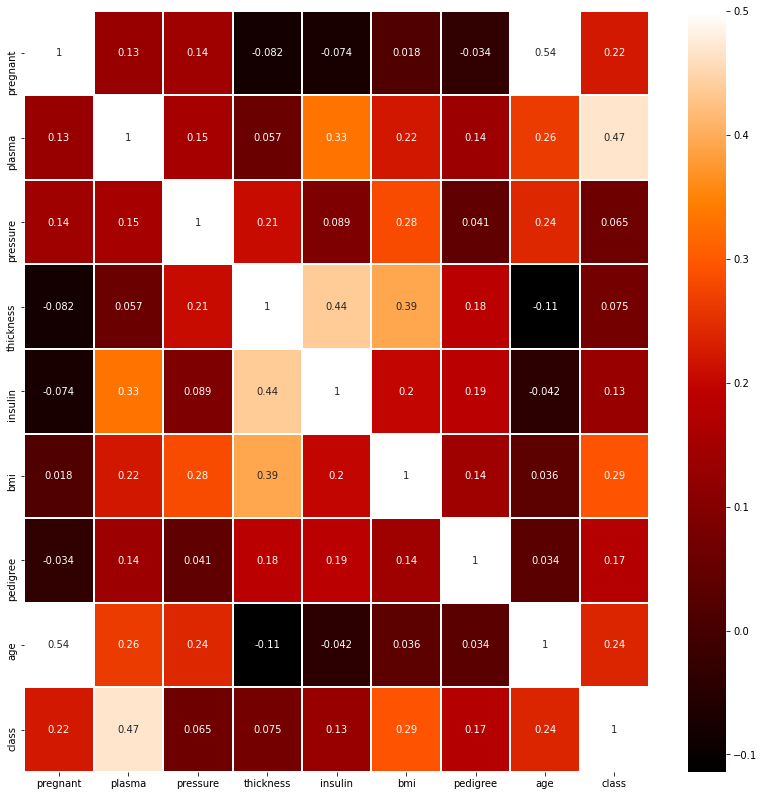

In [20]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(14,14))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

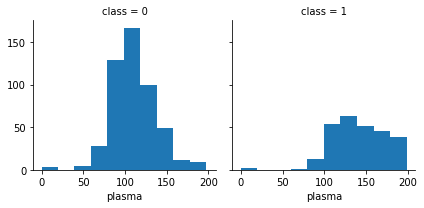

In [22]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

### 판다스와 사이킷런을 이용한 학습과 예측

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

numpy.random.seed(3)
tf.random.set_seed(3)

#dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter=',')
df = pd.read_csv('pima-indians-diabetes.csv')
train, test = train_test_split(df, test_size = 0.2)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

X_train = train_arr[:,0:8]
Y_train = train_arr[:,8]
X_test = test_arr[:,0:8]
Y_test = test_arr[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=200, batch_size=10)
score = model.evaluate(X_test, Y_test, verbose = 1)
print((score[1]))

Epoch 1/200
62/62 [==============================] - 0s 497us/step - loss: 13.5633 - accuracy: 0.6357
Epoch 2/200
62/62 [==============================] - 0s 441us/step - loss: 7.7166 - accuracy: 0.6457
Epoch 3/200
62/62 [==============================] - 0s 429us/step - loss: 4.9850 - accuracy: 0.5314
Epoch 4/200
62/62 [==============================] - 0s 457us/step - loss: 2.3310 - accuracy: 0.5433
Epoch 5/200
62/62 [==============================] - 0s 425us/step - loss: 1.4640 - accuracy: 0.5283
Epoch 6/200
62/62 [==============================] - 0s 441us/step - loss: 0.9743 - accuracy: 0.5018
Epoch 7/200
62/62 [==============================] - 0s 408us/step - loss: 0.8295 - accuracy: 0.5699
Epoch 8/200
62/62 [==============================] - 0s 421us/step - loss: 0.7504 - accuracy: 0.5706
Epoch 9/200
62/62 [==============================] - 0s 425us/step - loss: 0.7182 - accuracy: 0.6002
Epoch 10/200
62/62 [==============================] - 0s 429us/step - loss: 0.7196 - accur

Epoch 81/200
62/62 [==============================] - 0s 413us/step - loss: 0.4899 - accuracy: 0.7618
Epoch 82/200
62/62 [==============================] - 0s 406us/step - loss: 0.4971 - accuracy: 0.7617
Epoch 83/200
62/62 [==============================] - 0s 441us/step - loss: 0.5069 - accuracy: 0.7546
Epoch 84/200
62/62 [==============================] - 0s 409us/step - loss: 0.4882 - accuracy: 0.7740
Epoch 85/200
62/62 [==============================] - 0s 441us/step - loss: 0.5116 - accuracy: 0.7544
Epoch 86/200
62/62 [==============================] - 0s 454us/step - loss: 0.4953 - accuracy: 0.7551
Epoch 87/200
62/62 [==============================] - 0s 425us/step - loss: 0.5023 - accuracy: 0.7528
Epoch 88/200
62/62 [==============================] - 0s 407us/step - loss: 0.5260 - accuracy: 0.7475
Epoch 89/200
62/62 [==============================] - 0s 425us/step - loss: 0.4602 - accuracy: 0.7905
Epoch 90/200
62/62 [==============================] - 0s 436us/step - loss: 0.4834

62/62 [==============================] - 0s 471us/step - loss: 0.4524 - accuracy: 0.8011
Epoch 161/200
62/62 [==============================] - 0s 447us/step - loss: 0.4666 - accuracy: 0.7837
Epoch 162/200
62/62 [==============================] - 0s 425us/step - loss: 0.4643 - accuracy: 0.7748
Epoch 163/200
62/62 [==============================] - 0s 426us/step - loss: 0.4456 - accuracy: 0.8012
Epoch 164/200
62/62 [==============================] - 0s 451us/step - loss: 0.4373 - accuracy: 0.8066
Epoch 165/200
62/62 [==============================] - 0s 409us/step - loss: 0.4274 - accuracy: 0.8214
Epoch 166/200
62/62 [==============================] - 0s 411us/step - loss: 0.4507 - accuracy: 0.7989
Epoch 167/200
62/62 [==============================] - 0s 409us/step - loss: 0.4036 - accuracy: 0.8297
Epoch 168/200
62/62 [==============================] - 0s 416us/step - loss: 0.4538 - accuracy: 0.7738
Epoch 169/200
62/62 [==============================] - 0s 425us/step - loss: 0.4236 - a

In [36]:
prediction = model.predict(X_test)
human = prediction[int(input('조사할 환자의 번호를 넣으세요: '))]
p = human[0]*100
print(f'환자분이 당뇨에 걸릴 확률은 {p}% 이며 정확도는 : {score[1]*100}% 입니다.')

조사할 환자의 번호를 넣으세요: 0
환자분이 당뇨에 걸릴 확률은 18.169206380844116% 이며 정확도는 : 67.53246784210205% 입니다.


### Numpy를 이용한 딥러닝

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter = ",")
X = dataset[:, 0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(100, input_dim=8, activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y, epochs=200, batch_size=10)

print("\n 정확도 : %.4f"%(model.evaluate(X, Y)[1]))

Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4189 - accuracy: 0.6519
Epoch 2/200
2/2 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.6434
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1500 - accuracy: 0.6359
Epoch 4/200
2/2 [==============================] - 0s 1ms/step - loss: 1.0475 - accuracy: 0.6387
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.6194
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.6471
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.6823
Epoch 8/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.6799
Epoch 9/200
2/2 [==============================] - 0s 998us/step - loss: 0.7447 - accuracy: 0.5866
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6528
Epoch 11/200
2/2 [=========

2/2 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7554
Epoch 85/200
2/2 [==============================] - 0s 998us/step - loss: 0.4995 - accuracy: 0.7576
Epoch 86/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7572
Epoch 87/200
2/2 [==============================] - 0s 997us/step - loss: 0.4988 - accuracy: 0.7504
Epoch 88/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7465
Epoch 89/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7511
Epoch 90/200
2/2 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7598
Epoch 91/200
2/2 [==============================] - 0s 996us/step - loss: 0.4975 - accuracy: 0.7615
Epoch 92/200
2/2 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7493
Epoch 93/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7559
Epoch 94/200
2/2 [=========

2/2 [==============================] - 0s 996us/step - loss: 0.4860 - accuracy: 0.7773
Epoch 167/200
2/2 [==============================] - 0s 997us/step - loss: 0.4782 - accuracy: 0.7645
Epoch 168/200
2/2 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7589
Epoch 169/200
2/2 [==============================] - 0s 996us/step - loss: 0.4811 - accuracy: 0.7713
Epoch 170/200
2/2 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7576
Epoch 171/200
2/2 [==============================] - 0s 996us/step - loss: 0.4691 - accuracy: 0.7795
Epoch 172/200
2/2 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7609
Epoch 173/200
2/2 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7724
Epoch 174/200
2/2 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7812
Epoch 175/200
2/2 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7635
Epoch 176/200
2/